In [48]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [49]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [50]:
# Load Model
model=tf.keras.models.load_model('./models/object_detection.h5')
print('model loaded sucessfully')

model loaded sucessfully


In [51]:
path='./images/test images/Cars1.png'
image=load_img(path) #PIL object
image=np.array(image,dtype=np.uint8)
image1=load_img(path,target_size=(224,224))
image_arr_224=img_to_array(image1)/225.0 #convert into array and get the normaliszed output

In [52]:
#print size of the original image
h,w,d=image.shape
print('Height of the image =',h)
print('Width of the image=',w)

Height of the image = 248
Width of the image= 400


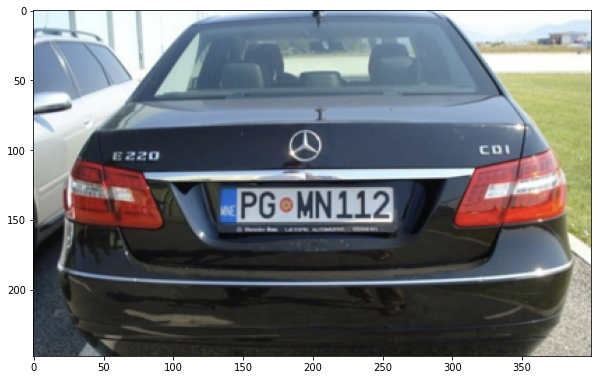

In [53]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [54]:
image_arr_224.shape

(224, 224, 3)

In [55]:
test_arr=image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [56]:
#make predictions
coords=model.predict(test_arr)
coords

array([[0.3323329 , 0.6484095 , 0.53910035, 0.6500477 ]], dtype=float32)

# Denormalize outputs

In [57]:
denorm=np.array([w,w,h,h])
coords=coords*denorm

In [58]:
coords

array([[132.93316364, 259.36379433, 133.69688654, 161.21183443]])

In [59]:
coords=coords.astype(np.int32)
coords

array([[132, 259, 133, 161]])

# Bounding Box

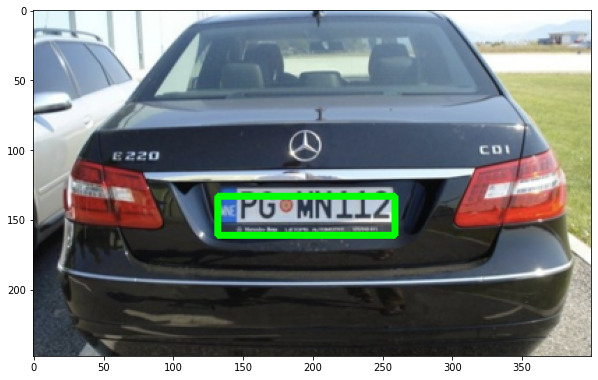

In [60]:
xmin,xmax,ymin,ymax=coords[0]
pt1=(xmin,ymin)
pt2=(xmax,ymax)
pt1,pt2
cv2.rectangle(image,pt1,pt2,(0,255,0),3)


plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

## Create aPipeline model

In [61]:

def object_detection(path):
    image=load_img(path) #PIL object
    image=np.array(image,dtype=np.uint8)
    image1=load_img(path,target_size=(224,224))
    image_arr_224=img_to_array(image1)/225.0 #convert into array and get the normaliszed output
    h,w,d=image.shape
    test_arr=image_arr_224.reshape(1,224,224,3)   
    #make predictions
    coords=model.predict(test_arr)
    
    denorm=np.array([w,w,h,h])
    coords=coords*denorm
    
    coords=coords.astype(np.int32)
    
    xmin,xmax,ymin,ymax=coords[0]
    pt1=(xmin,ymin)
    pt2=(xmax,ymax)
    pt1,pt2
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    
    return image, coords   

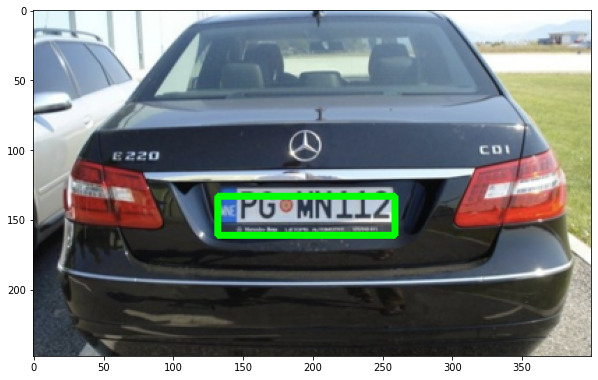

In [62]:
path='./images/test images/cars1.png'
image,cods=object_detection(path)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

# Optical Character Recognition- OCR

In [63]:
import pytesseract as pt

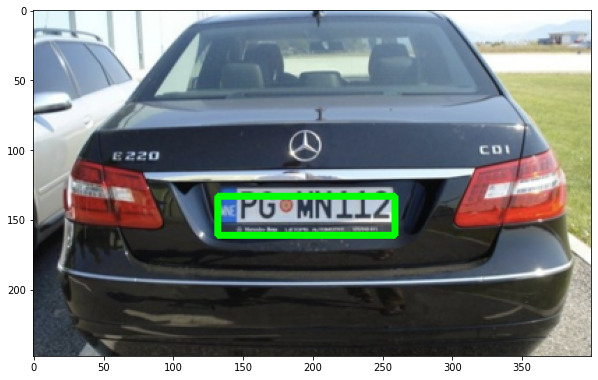

In [64]:
path='./images/test images/cars1.png'
image,cods=object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [65]:
img=np.array(load_img(path))
xmin,xmax,ymin,ymax=cods[0]
roi=img[ymin:ymax,xmin:xmax]

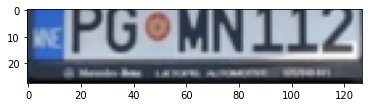

In [66]:
plt.imshow(roi)
plt.show()

In [67]:
# extract text from image
text=pt.image_to_string(roi)
text

''